<a href="https://colab.research.google.com/github/ChaoticNeuron/Machine-Learning/blob/main/pyladies_ieee_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear regression with MSE**



In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [14]:
#@title Plotting Functions

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

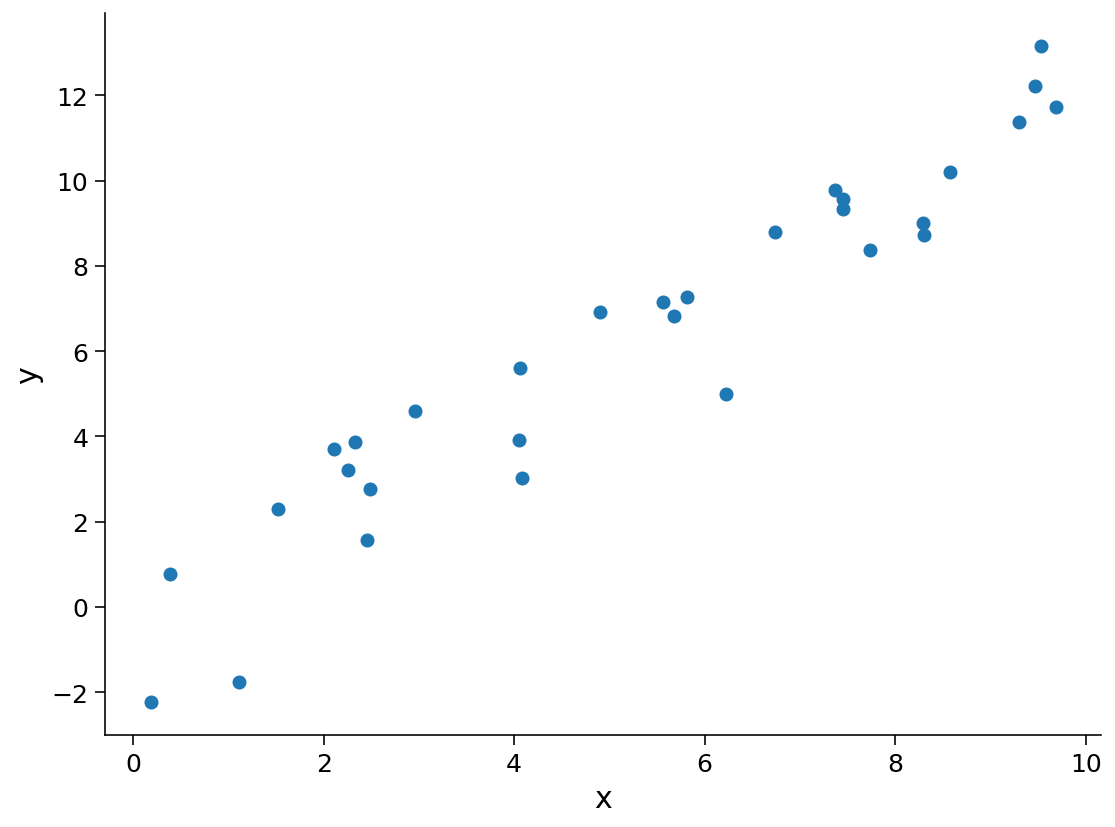

In [15]:
# @title

# @markdown Execute this cell to generate some simulated data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

In [16]:
def mse(x, y, theta_hat):
  """Compute the mean squared error

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """

  # Compute the estimated y
  y_hat = theta_hat * x

  # Compute mean squared error
  mse = np.mean((y - y_hat)**2)

  return mse


theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
  print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")

theta_hat of 0.75 has an MSE of 9.08
theta_hat of 1.0 has an MSE of 3.01
theta_hat of 1.5 has an MSE of 4.52


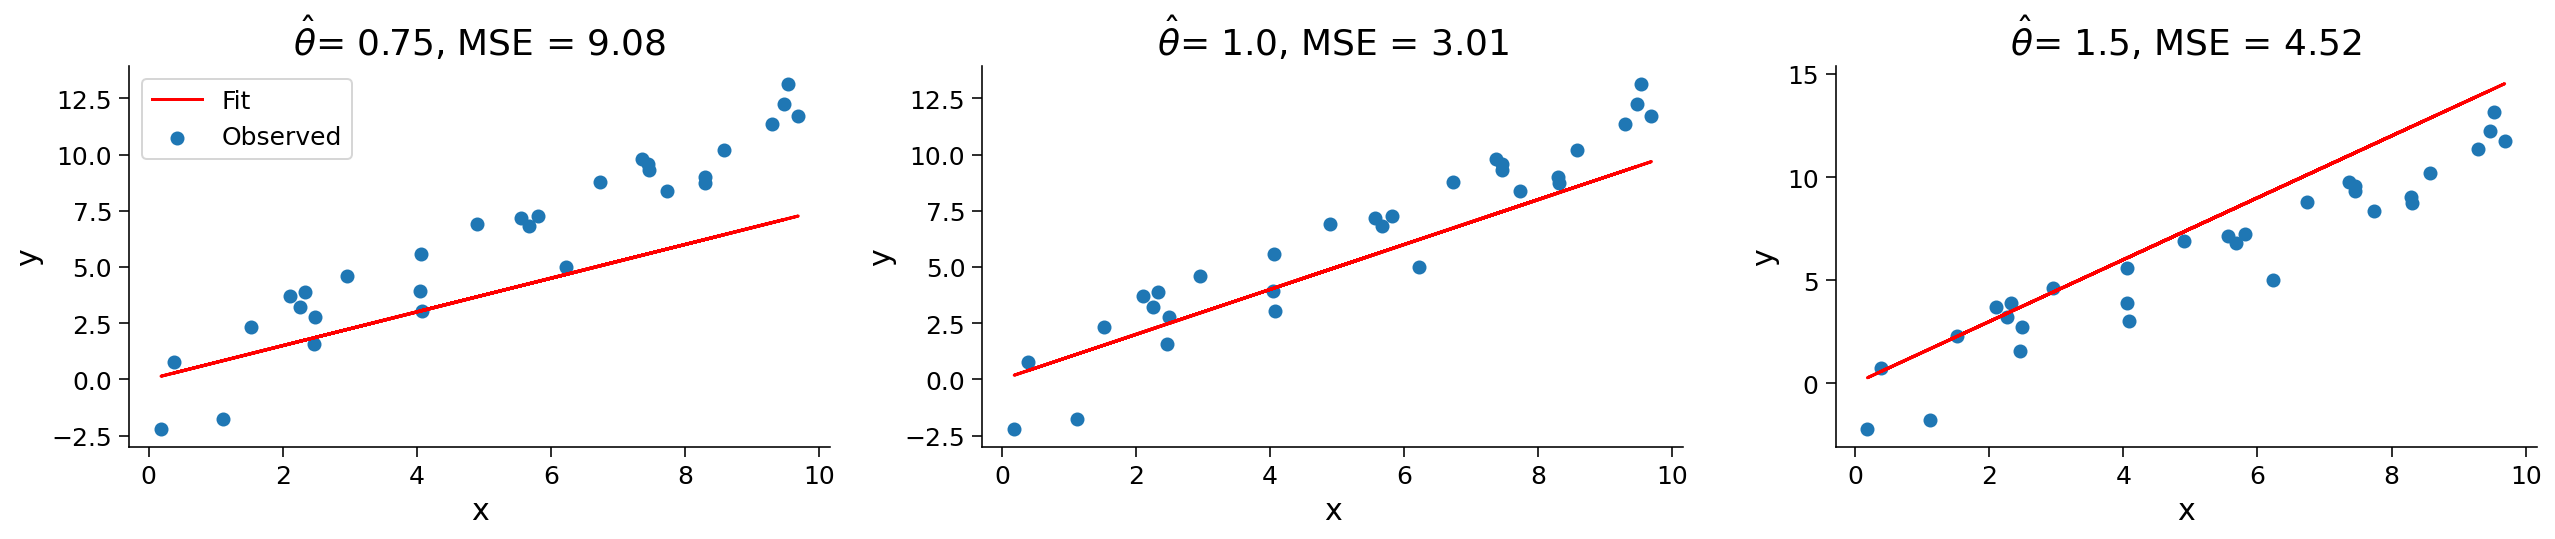

In [17]:
#@title

#@markdown Execute this cell to visualize estimated models

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax in zip(theta_hats, axes):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {np.mean((y - y_hat)**2):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()

In [18]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

@widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
  y_hat = theta_hat * x
  plot_observed_vs_predicted(x, y, y_hat, theta_hat)

interactive(children=(FloatSlider(value=1.0, description='theta_hat', max=2.0), Output()), _dom_classes=('widg…

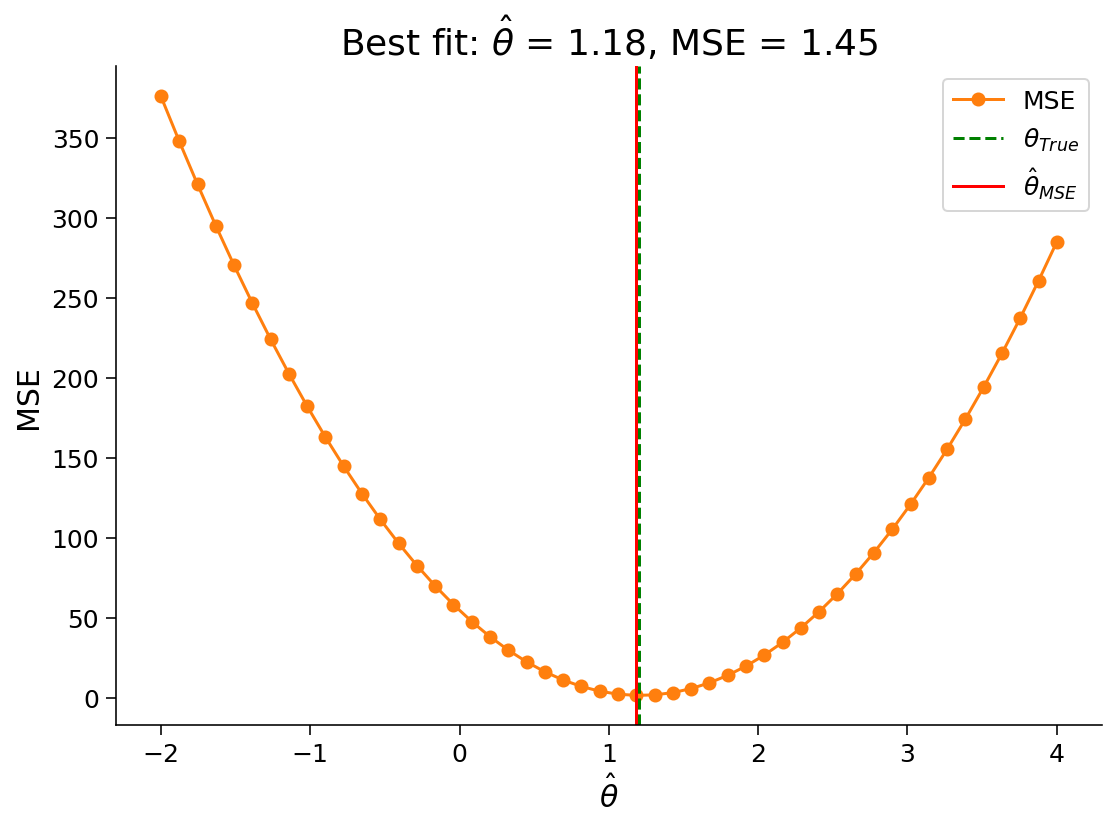

In [19]:
# @title

# @markdown Execute this cell to loop over theta_hats, compute MSE, and plot results

# Loop over different thetas, compute MSE for each
theta_hat_grid = np.linspace(-2.0, 4.0)
errors = np.zeros(len(theta_hat_grid))
for i, theta_hat in enumerate(theta_hat_grid):
  errors[i] = mse(x, y, theta_hat)

# Find theta that results in lowest error
best_error = np.min(errors)
theta_hat = theta_hat_grid[np.argmin(errors)]


# Plot results
fig, ax = plt.subplots()
ax.plot(theta_hat_grid, errors, '-o', label='MSE', c='C1')
ax.axvline(theta, color='g', ls='--', label=r"$\theta_{True}$")
ax.axvline(theta_hat, color='r', ls='-', label=r"$\hat{{\theta}}_{MSE}$")
ax.set(
  title=fr"Best fit: $\hat{{\theta}}$ = {theta_hat:.2f}, MSE = {best_error:.2f}",
  xlabel=r"$\hat{{\theta}}$",
  ylabel='MSE')
ax.legend();

---
# Least-squares optimization

\begin{align}
\hat\theta = \frac{\mathbf{x}^\top \mathbf{y}}{\mathbf{x}^\top \mathbf{x}}
\end{align}
where $\mathbf{x}$ and $\mathbf{y}$ are vectors of data points.


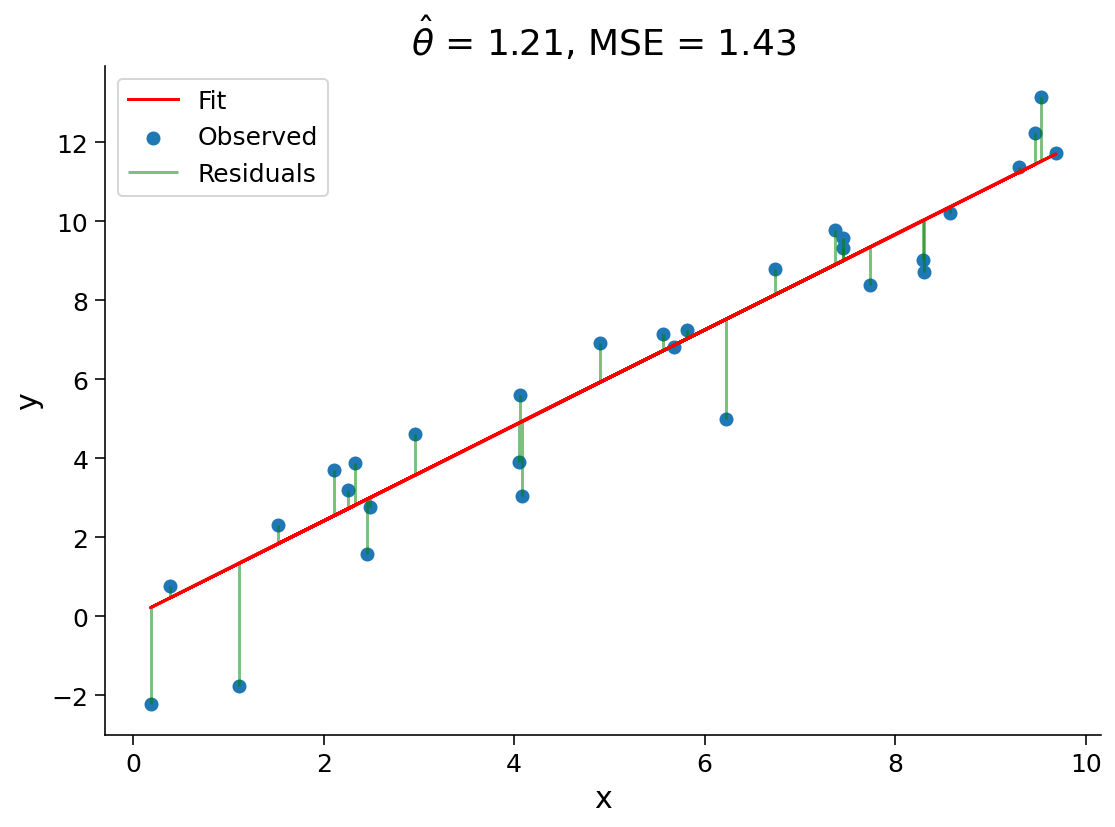

In [20]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """



  # Compute theta_hat analytically
  theta_hat = (x.T @ y) / (x.T @ x)

  return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x
plot_observed_vs_predicted(x, y, y_hat, theta_hat)

# **Linear regression with MLE**


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [22]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [23]:
# @title Plotting Functions
def plot_density_image(x, y, theta, sigma=1, ax=None):
  """ Plots probability distribution of y given x, theta, and sigma

  Args:

    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta (float): Slope parameter
    sigma (float): standard deviation of Gaussian noise

  """

  # plot the probability density of p(y|x,theta)
  if ax is None:
    fig, ax = plt.subplots()

  xmin, xmax = np.floor(np.min(x)), np.ceil(np.max(x))
  ymin, ymax = np.floor(np.min(y)), np.ceil(np.max(y))
  xx = np.linspace(xmin, xmax, 50)
  yy = np.linspace(ymin, ymax, 50)

  surface = np.zeros((len(yy), len(xx)))
  for i, x_i in enumerate(xx):
    surface[:, i] = stats.norm(theta * x_i, sigma).pdf(yy)

  ax.set(xlabel='x', ylabel='y')

  return ax.imshow(surface, origin='lower', aspect='auto', vmin=0, vmax=None,
            cmap=plt.get_cmap('Wistia'),
            extent=[xmin, xmax, ymin, ymax])

In [24]:
# @markdown Make sure you execute this cell to enable the widget!

@widgets.interact(mu=widgets.FloatSlider(0.0, min=-2.0, max=2.0),
                  sigma=widgets.FloatSlider(1.0, min=0.5, max=2.0))
def plot_normal_dist(mu=0, sigma=1):

  # Generate pdf & samples from normal distribution with mu/sigma
  rv = stats.norm(mu, sigma)
  x = np.linspace(-5, 5, 100)
  y = rv.pdf(x)
  samples = rv.rvs(1000)

  # Plot
  fig, ax = plt.subplots()
  ax.hist(samples, 20, density=True, color='g', histtype='stepfilled', alpha=0.8,
          label='histogram')
  ax.plot(x, y, color='orange', linewidth=3, label='pdf')
  ax.vlines(mu, 0, rv.pdf(mu), color='y', linewidth=3, label='$\mu$')
  ax.vlines([mu-sigma, mu+sigma], 0, rv.pdf([mu-sigma, mu+sigma]), colors='red',
            color='b', linewidth=3, label='$\sigma$')
  ax.set(xlabel='x', ylabel='probability density', xlim=[-5, 5], ylim=[0, 1.0])
  ax.legend()

interactive(children=(FloatSlider(value=0.0, description='mu', max=2.0, min=-2.0), FloatSlider(value=1.0, desc…

In [25]:
# @markdown Execute this cell to generate some simulated data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence

np.random.seed(121)
theta = 1.2
n_samples = 30
x = 10 * np.random.rand(n_samples) # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples) # sample from a standard normal distribution
y = theta * x + noise

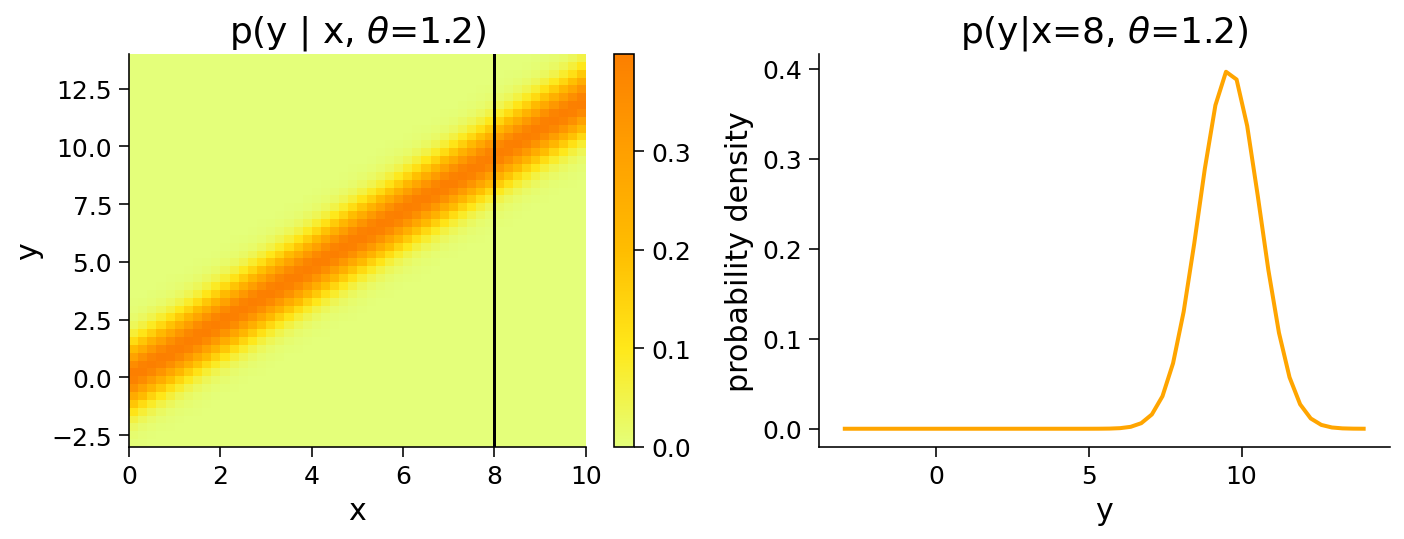

In [26]:
# @markdown Execute this cell to visualize p(y|x, theta=1.2)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# Invokes helper function to generate density image plots from data and parameters
im = plot_density_image(x, y, 1.2, ax=ax1)
plt.colorbar(im, ax=ax1)
ax1.axvline(8, color='k')
ax1.set(title=r'p(y | x, $\theta$=1.2)')

# Plot pdf for given x
ylim = ax1.get_ylim()
yy = np.linspace(ylim[0], ylim[1], 50)
ax2.plot(yy, stats.norm(theta * 8, 1).pdf(yy), color='orange', linewidth=2)
ax2.set(
    title=r'p(y|x=8, $\theta$=1.2)',
    xlabel='y',
    ylabel='probability density');

# **Likelihood Estimation**
\begin{align}
\mathcal{L}(\theta|x,y) = p(y|x,\theta) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(y-\theta x)^2}
\end{align}

In [27]:
def likelihood(theta_hat, x, y):
  """The likelihood function for a linear model with noise sampled from a
    Gaussian distribution with zero mean and unit variance.

  Args:
    theta_hat (float): An estimate of the slope parameter.
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    ndarray: the likelihood values for the theta_hat estimate
  """
  sigma = 1

  # Compute Gaussian likelihood
  pdf =  1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-(y - theta_hat * x)**2 / (2 * sigma**2))

  return pdf


print(likelihood(1.0, x[1], y[1]))

0.11344443599846923


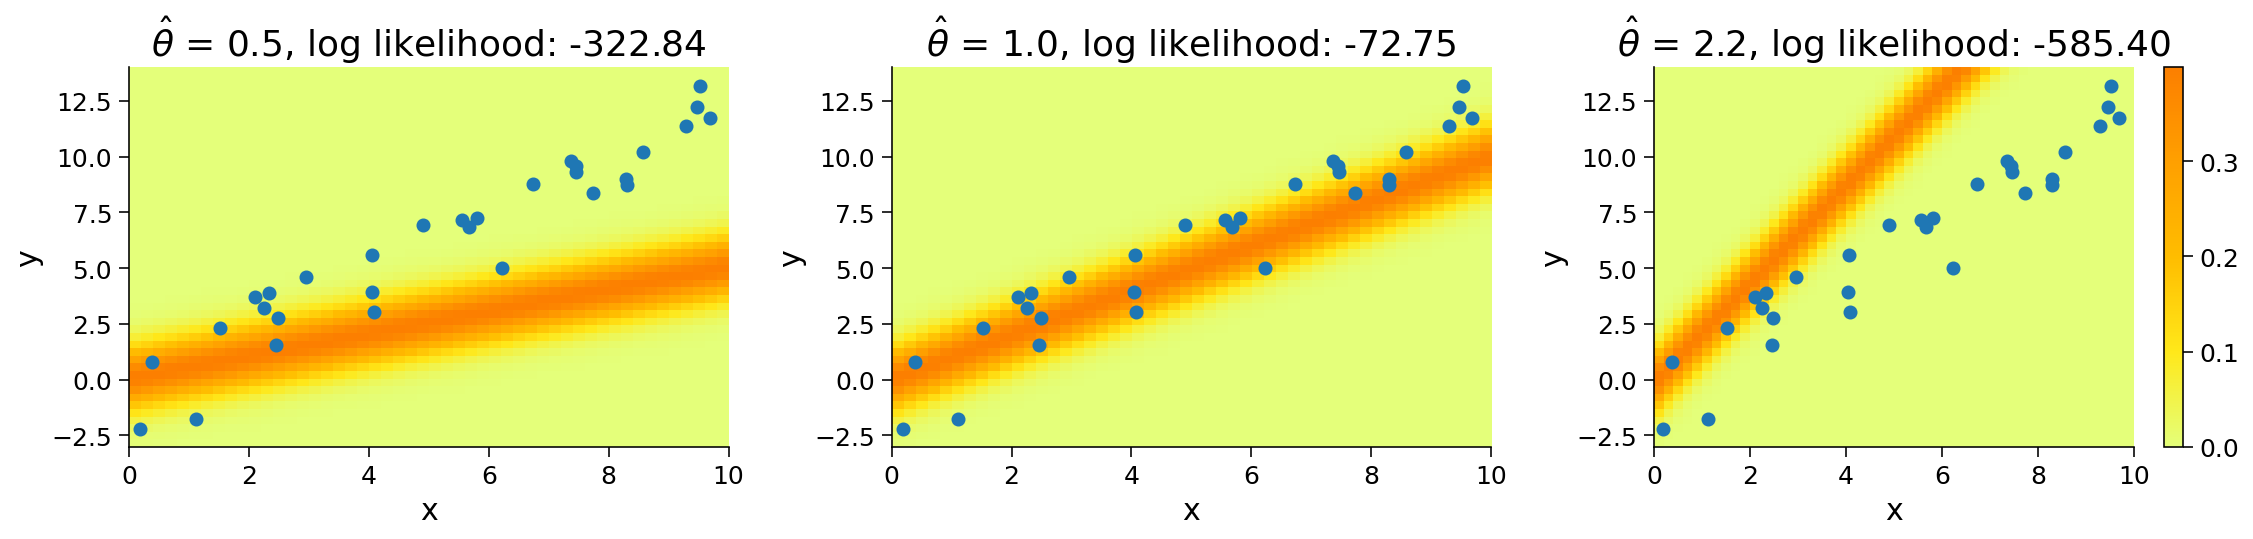

In [28]:
# @markdown Execute this cell to visualize different distribution densities
theta_hats = [0.5, 1.0, 2.2]
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
for theta_hat, ax in zip(theta_hats, axes):
  ll = np.sum(np.log(likelihood(theta_hat, x, y)))  # log likelihood
  im = plot_density_image(x, y, theta_hat, ax=ax)
  ax.scatter(x, y)
  ax.set(title=fr'$\hat{{\theta}}$ = {theta_hat}, log likelihood: {ll:.2f}')
plt.colorbar(im, ax=ax);

# **Finding the Maximum Likelihood Estimator**

In [29]:
# Compute theta_hat_MLE
theta_hat_mle = (x @ y) / (x @ x)

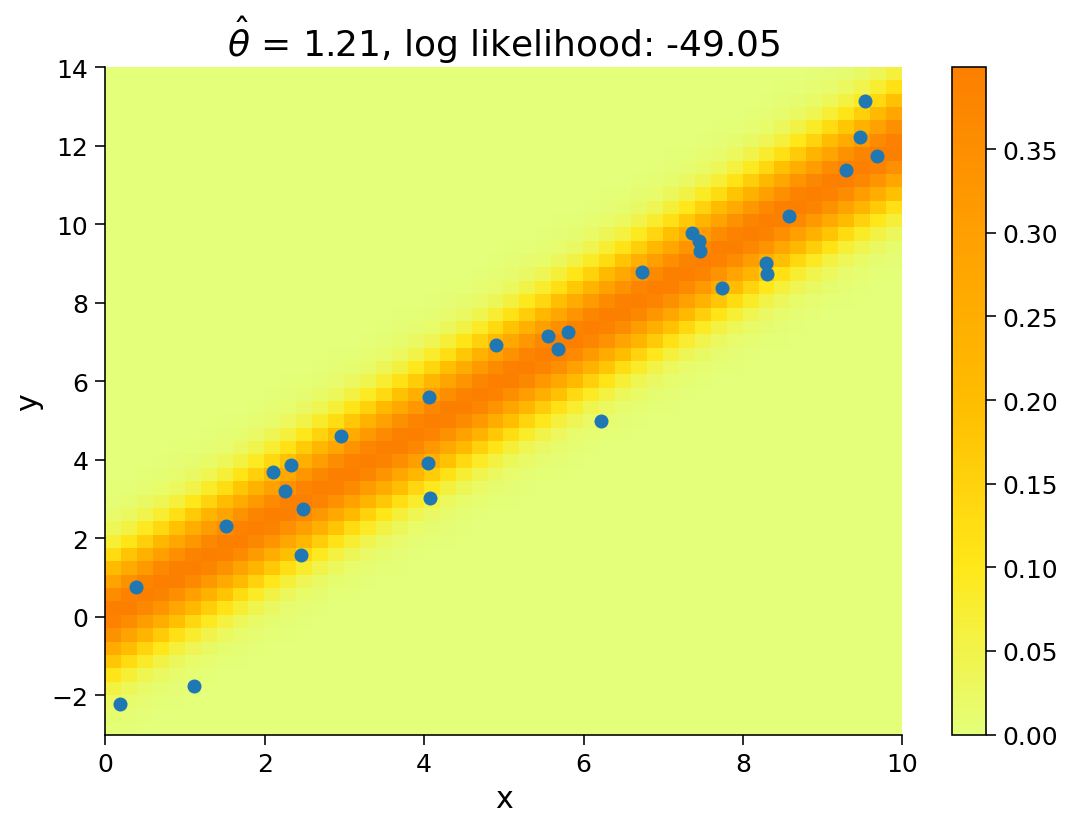

In [30]:
#@title
#@markdown Execute this cell to visualize density with theta_hat_mle

# Plot the resulting distribution density
fig, ax = plt.subplots()
ll = np.sum(np.log(likelihood(theta_hat_mle, x, y))) # log likelihood
im = plot_density_image(x, y, theta_hat_mle, ax=ax)
plt.colorbar(im, ax=ax);
ax.scatter(x, y)
ax.set(title=fr'$\hat{{\theta}}$ = {theta_hat_mle:.2f}, log likelihood: {ll:.2f}');

# **Confidence intervals and bootstrapping**

In [31]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

In [32]:
#@title Figure Settings
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [33]:
# @title Plotting Functions

def plot_original_and_resample(x, y, x_, y_):
  """ Plot the original sample and the resampled points from this sample.

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    x_ (ndarray): An array of shape (samples,) with a subset of input values from x
    y_ (ndarray): An array of shape (samples,) with a the corresponding subset
      of measurement values as x_ from y

  """
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  ax1.scatter(x, y)
  ax1.set(title='Original', xlabel='x', ylabel='y')

  ax2.scatter(x_, y_, color='c')

  ax2.set(title='Resampled', xlabel='x', ylabel='y',
          xlim=ax1.get_xlim(), ylim=ax1.get_ylim());

# **Bootstrapping**

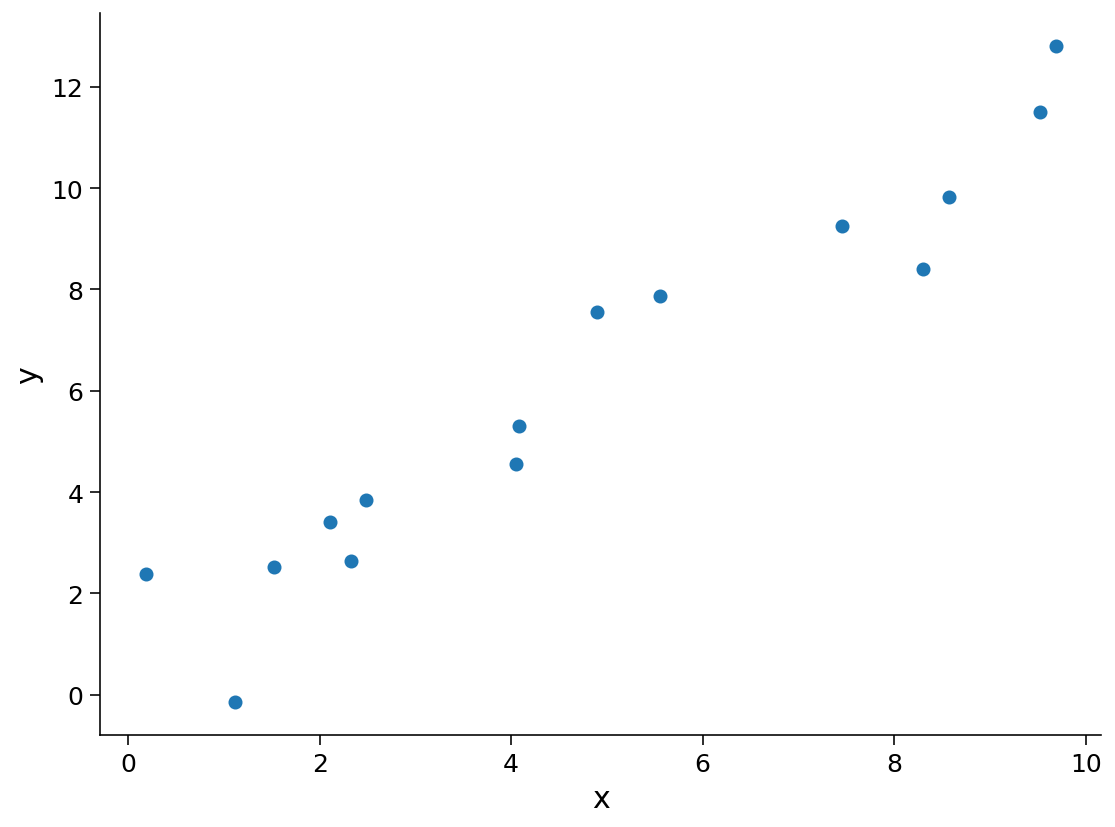

In [34]:
#@title

#@markdown Execute this cell to simulate some data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 15

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

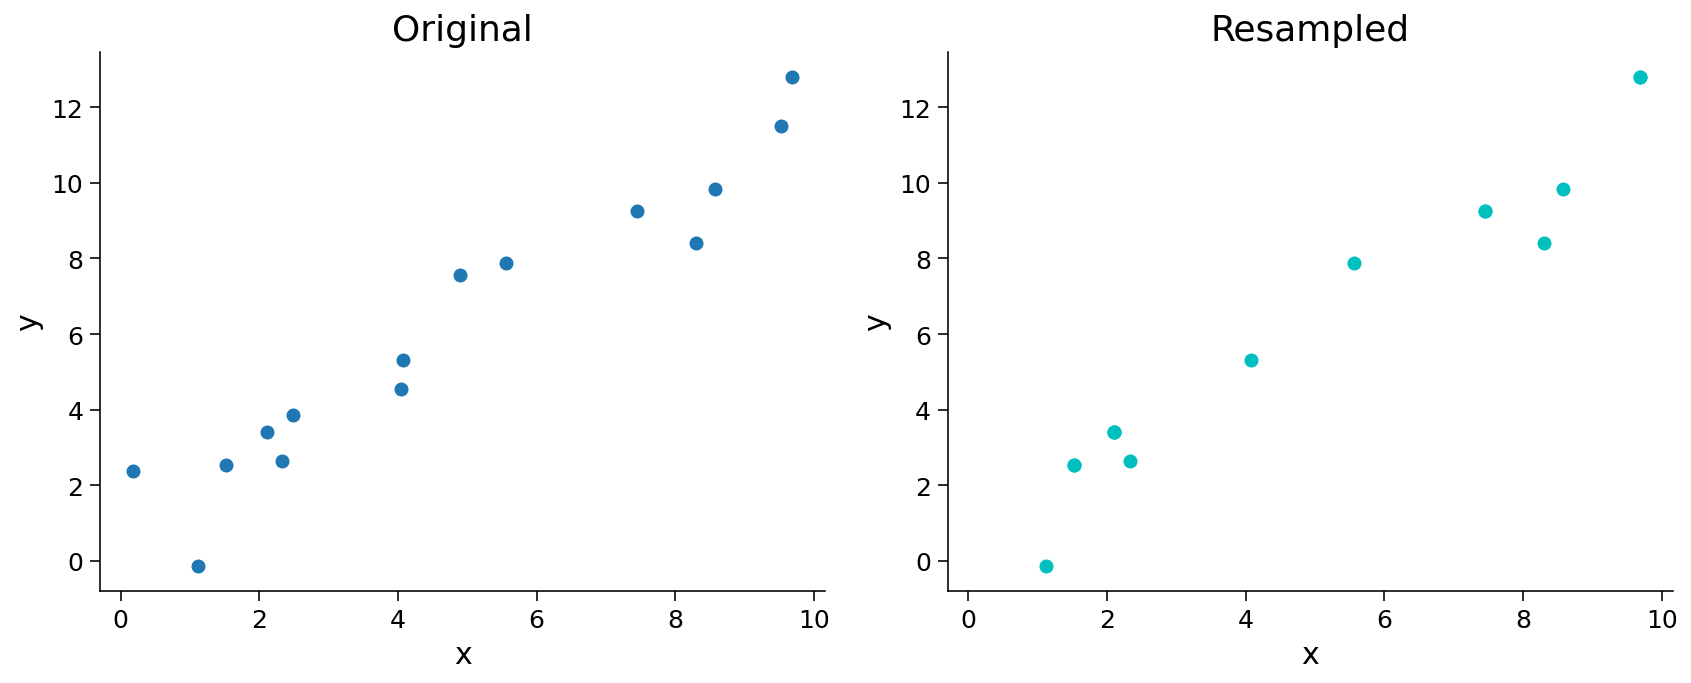

In [35]:
def resample_with_replacement(x, y):
  """Resample data points with replacement from the dataset of `x` inputs and
  `y` measurements.

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    ndarray, ndarray: The newly resampled `x` and `y` data points.
  """


  # Get array of indices for resampled points
  sample_idx = np.random.choice(len(x), size=len(x), replace=True)

  # Sample from x and y according to sample_idx
  x_ = x[sample_idx]
  y_ = y[sample_idx]

  return x_, y_

x_, y_ = resample_with_replacement(x, y)

plot_original_and_resample(x, y, x_, y_)

# **Bootstrap Estimates**

In [36]:
# @markdown Execute this cell for helper function `solve_normal_eqn`
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    thata_hat (float): An estimate of the slope parameter.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """
  theta_hat = (x.T @ y) / (x.T @ x)
  return theta_hat

In [37]:
def bootstrap_estimates(x, y, n=2000):
  """Generate a set of theta_hat estimates using the bootstrap method.

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    n (int): The number of estimates to compute

  Returns:
    ndarray: An array of estimated parameters with size (n,)
  """
  theta_hats = np.zeros(n)



  # Loop over number of estimates
  for i in range(n):

    # Resample x and y
    x_, y_ = resample_with_replacement(x, y)

    # Compute theta_hat for this sample
    theta_hats[i] = solve_normal_eqn(x_, y_)

  return theta_hats


# Set random seed
np.random.seed(123)

# Get boostrap estimates
theta_hats = bootstrap_estimates(x, y, n=2000)
print(theta_hats[0:5])

[1.27550888 1.17317819 1.18198819 1.25329255 1.20714664]


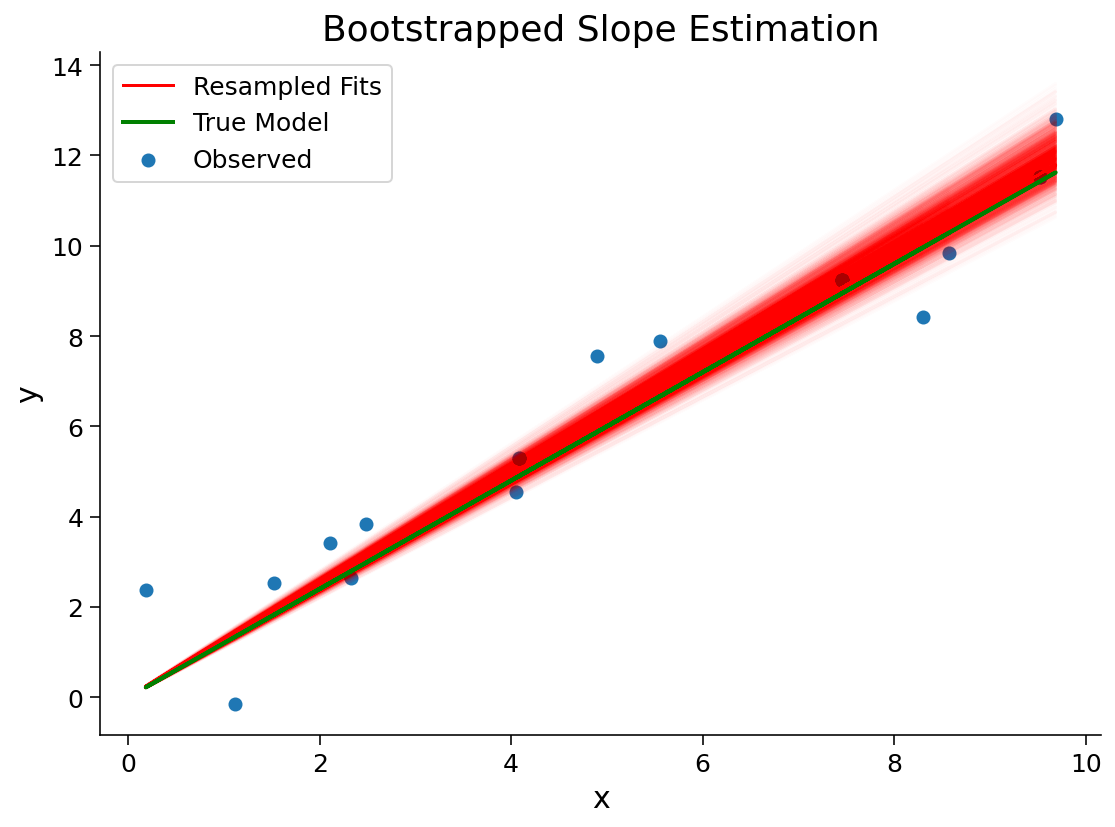

In [38]:
#@title
#@markdown Execute this cell to visualize all potential models

fig, ax = plt.subplots()

# For each theta_hat, plot model
theta_hats = bootstrap_estimates(x, y, n=2000)
for i, theta_hat in enumerate(theta_hats):
  y_hat = theta_hat * x
  ax.plot(x, y_hat, c='r', alpha=0.01, label='Resampled Fits' if i==0 else '')

# Plot observed data
ax.scatter(x, y, label='Observed')

# Plot true fit data
y_true = theta * x
ax.plot(x, y_true, 'g', linewidth=2, label='True Model')

ax.set(
  title='Bootstrapped Slope Estimation',
  xlabel='x',
  ylabel='y'
)

# Change legend line alpha property
handles, labels = ax.get_legend_handles_labels()
handles[0].set_alpha(1)

ax.legend();

# **Confidence Intervals**

mean = 1.24, std = 0.05


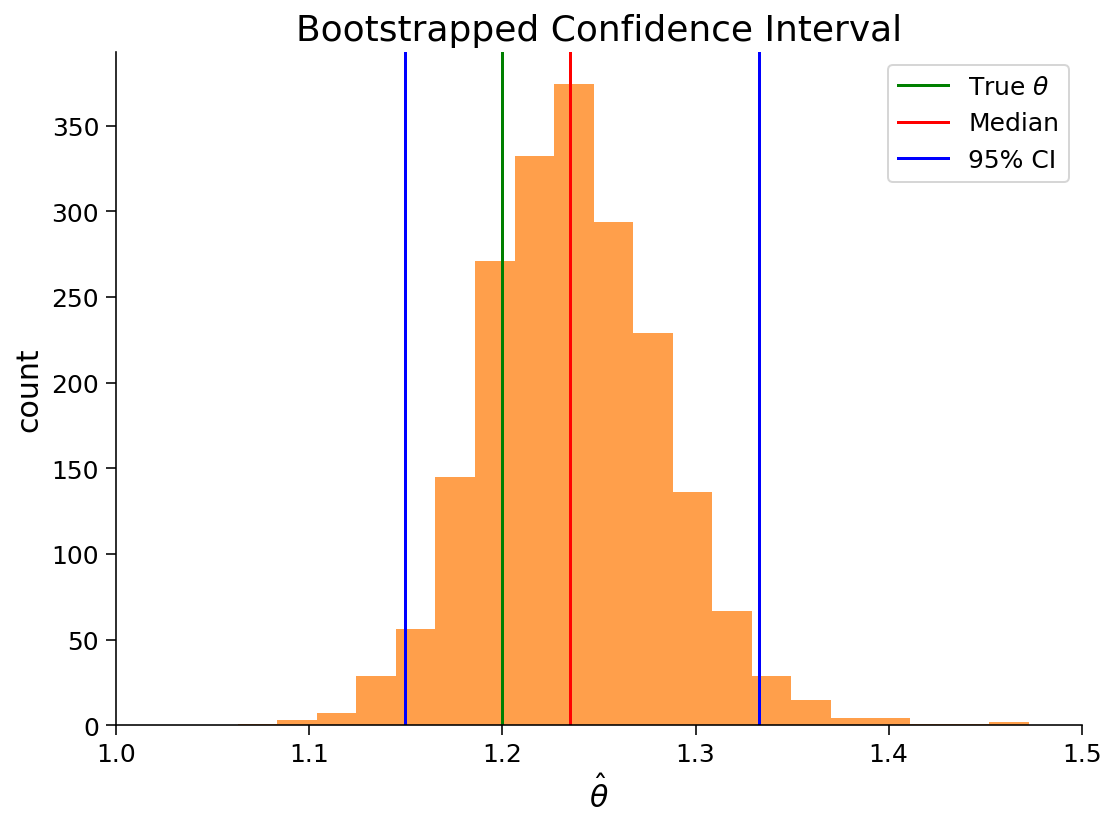

In [39]:
#@title

#@markdown Execute this cell to plot bootstrapped CI

theta_hats = bootstrap_estimates(x, y, n=2000)
print(f"mean = {np.mean(theta_hats):.2f}, std = {np.std(theta_hats):.2f}")

fig, ax = plt.subplots()
ax.hist(theta_hats, bins=20, facecolor='C1', alpha=0.75)
ax.axvline(theta, c='g', label=r'True $\theta$')
ax.axvline(np.percentile(theta_hats, 50), color='r', label='Median')
ax.axvline(np.percentile(theta_hats, 2.5), color='b', label='95% CI')
ax.axvline(np.percentile(theta_hats, 97.5), color='b')
ax.legend()
ax.set(
    title='Bootstrapped Confidence Interval',
    xlabel=r'$\hat{{\theta}}$',
    ylabel='count',
    xlim=[1.0, 1.5]
);

# **Multiple linear regression and polynomial regression**

In [40]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

In [41]:
#@title Figure Settings
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# @title Plotting Functions

def evaluate_fits(order_list, mse_list):
  """ Compare the quality of multiple polynomial fits
  by plotting their MSE values.

  Args:
    order_list (list): list of the order of polynomials to be compared
    mse_list (list): list of the MSE values for the corresponding polynomial fit
  """
  fig, ax = plt.subplots()
  ax.bar(order_list, mse_list)
  ax.set(title='Comparing Polynomial Fits', xlabel='Polynomial order', ylabel='MSE')

def plot_fitted_polynomials(x, y, theta_hat):
  """ Plot polynomials of different orders

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    theta_hat (dict): polynomial regression weights for different orders
  """

  x_grid = np.linspace(x.min() - .5, x.max() + .5)

  plt.figure()

  for order in range(0, max_order + 1):
    X_design = make_design_matrix(x_grid, order)
    plt.plot(x_grid, X_design @ theta_hat[order]);

  plt.ylabel('y')
  plt.xlabel('x')
  plt.plot(x, y, 'C0.');
  plt.legend([f'order {o}' for o in range(max_order + 1)], loc=1)
  plt.title('polynomial fits')
  plt.show()

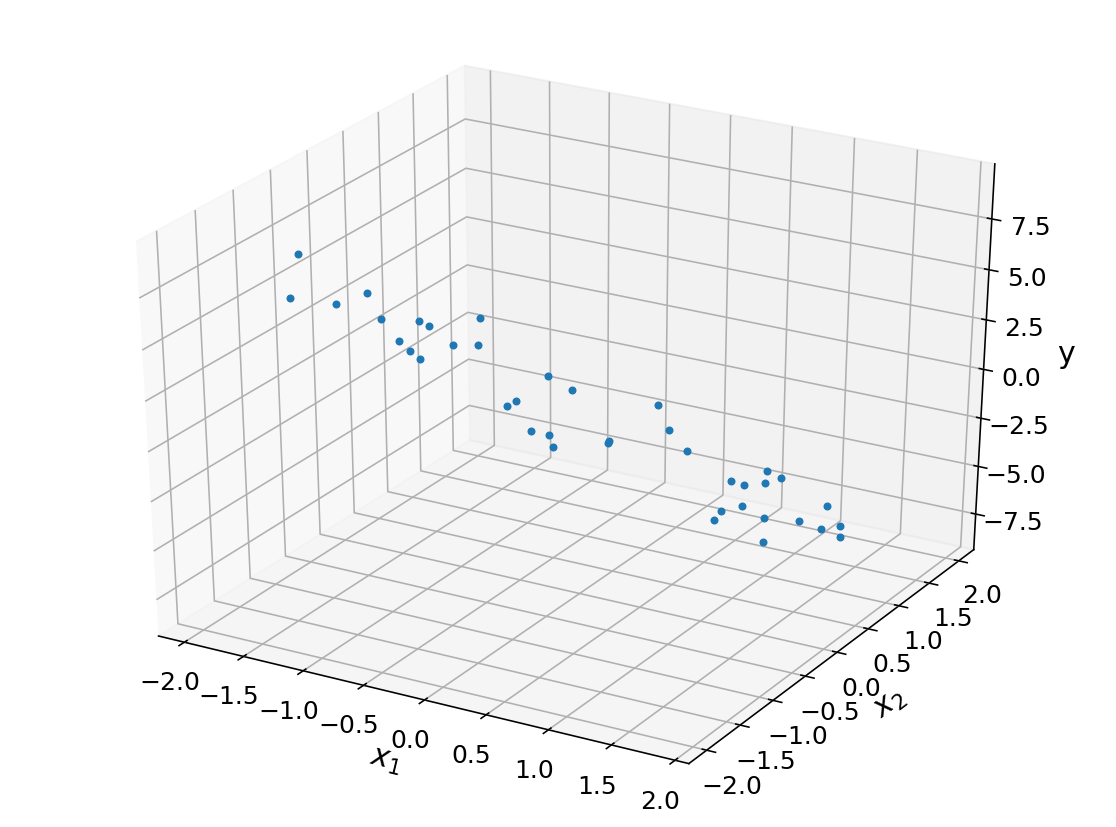

In [42]:
#@title Figure Settings
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# @title Plotting Functions

def evaluate_fits(order_list, mse_list):
  """ Compare the quality of multiple polynomial fits
  by plotting their MSE values.

  Args:
    order_list (list): list of the order of polynomials to be compared
    mse_list (list): list of the MSE values for the corresponding polynomial fit
  """
  fig, ax = plt.subplots()
  ax.bar(order_list, mse_list)
  ax.set(title='Comparing Polynomial Fits', xlabel='Polynomial order', ylabel='MSE')

def plot_fitted_polynomials(x, y, theta_hat):
  """ Plot polynomials of different orders

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    theta_hat (dict): polynomial regression weights for different orders
  """

  x_grid = np.linspace(x.min() - .5, x.max() + .5)

  plt.figure()

  for order in range(0, max_order + 1):
    X_design = make_design_matrix(x_grid, order)
    plt.plot(x_grid, X_design @ theta_hat[order]);

  plt.ylabel('y')
  plt.xlabel('x')
  plt.plot(x, y, 'C0.');
  plt.legend([f'order {o}' for o in range(max_order + 1)], loc=1)
  plt.title('polynomial fits')
  plt.show()

# @markdown Execute this cell to simulate some data

# Set random seed for reproducibility
np.random.seed(1234)

# Set parameters
theta = [0, -2, -3]
n_samples = 40

# Draw x and calculate y
n_regressors = len(theta)
x0 = np.ones((n_samples, 1))
x1 = np.random.uniform(-2, 2, (n_samples, 1))
x2 = np.random.uniform(-2, 2, (n_samples, 1))
X = np.hstack((x0, x1, x2))
noise = np.random.randn(n_samples)
y = X @ theta + noise


ax = plt.subplot(projection='3d')
ax.plot(X[:,1], X[:,2], y, '.')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

In [43]:
def ordinary_least_squares(X, y):
  """Ordinary least squares estimator for linear regression.

  Args:
    x (ndarray): design matrix of shape (n_samples, n_regressors)
    y (ndarray): vector of measurements of shape (n_samples)

  Returns:
    ndarray: estimated parameter values of shape (n_regressors)
  """


  # Compute theta_hat using OLS
  theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

  return theta_hat


theta_hat = ordinary_least_squares(X, y)
print(theta_hat)

[ 0.13861386 -2.09395731 -3.16370742]


In [44]:
# Compute predicted data
theta_hat = ordinary_least_squares(X, y)
y_hat = X @ theta_hat

# Compute MSE
print(f"MSE = {np.mean((y - y_hat)**2):.2f}")

MSE = 0.91


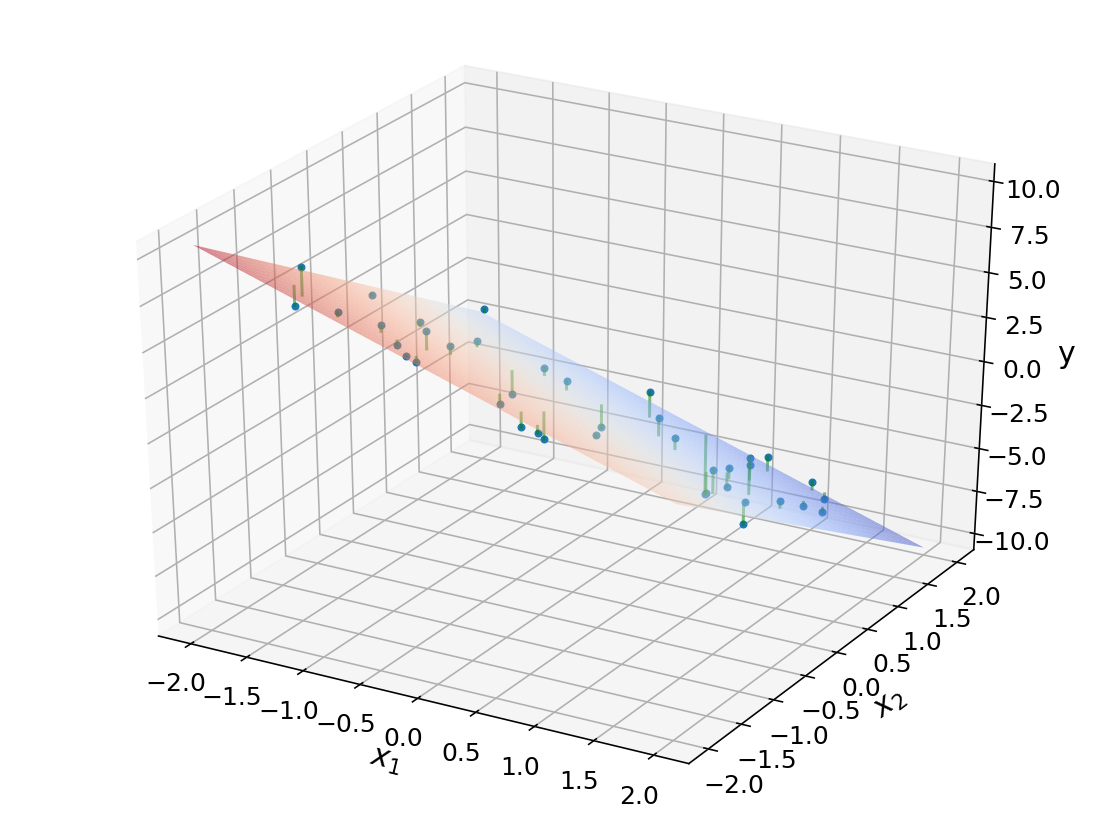

In [45]:
# @markdown Execute this cell to visualize data and predicted plane

theta_hat = ordinary_least_squares(X, y)
xx, yy = np.mgrid[-2:2:50j, -2:2:50j]
y_hat_grid = np.array([xx.flatten(), yy.flatten()]).T @ theta_hat[1:]
y_hat_grid = y_hat_grid.reshape((50, 50))

ax = plt.subplot(projection='3d')
ax.plot(X[:, 1], X[:, 2], y, '.')
ax.plot_surface(xx, yy, y_hat_grid, linewidth=0, alpha=0.5, color='C1',
                cmap=plt.get_cmap('coolwarm'))

for i in range(len(X)):
  ax.plot((X[i, 1], X[i, 1]),
          (X[i, 2], X[i, 2]),
          (y[i], y_hat[i]),
          'g-', alpha=.5)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

# **Polynomial Regression**

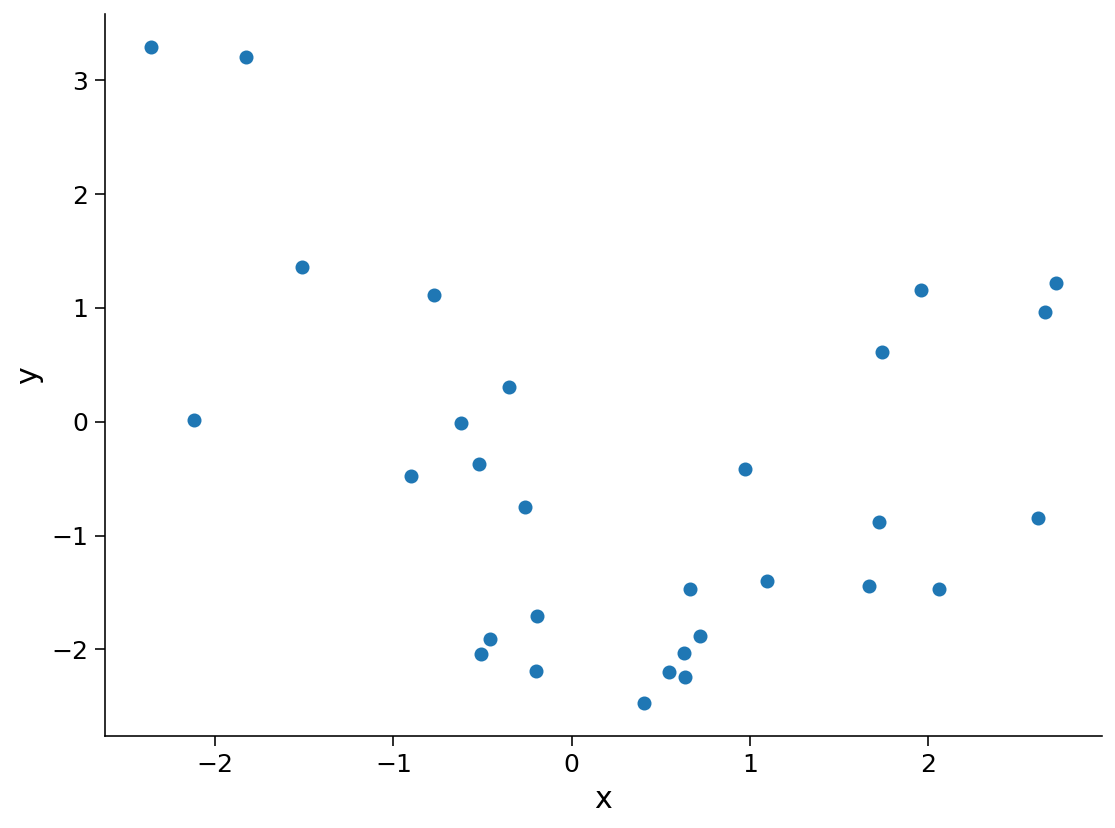

In [46]:
# @markdown Execute this cell to simulate some data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)
n_samples = 30
x = np.random.uniform(-2, 2.5, n_samples)  # inputs uniformly sampled from [-2, 2.5)
y =  x**2 - x - 2   # computing the outputs

output_noise = 1/8 * np.random.randn(n_samples)
y += output_noise  # adding some output noise

input_noise = 1/2 * np.random.randn(n_samples)
x += input_noise  # adding some input noise

fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

In [47]:
def make_design_matrix(x, order):
  """Create the design matrix of inputs for use in polynomial regression

  Args:
    x (ndarray): input vector of shape (n_samples)
    order (scalar): polynomial regression order

  Returns:
    ndarray: design matrix for polynomial regression of shape (samples, order+1)
  """


  # Broadcast to shape (n x 1) so dimensions work
  if x.ndim == 1:
    x = x[:, None]

  #if x has more than one feature, we don't want multiple columns of ones so we assign
  # x^0 here
  design_matrix = np.ones((x.shape[0], 1))

  # Loop through rest of degrees and stack columns (hint: np.hstack)
  for degree in range(1, order + 1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix


order = 5
X_design = make_design_matrix(x, order)

print(X_design[0:2, 0:2])

[[ 1.         -1.51194917]
 [ 1.         -0.35259945]]


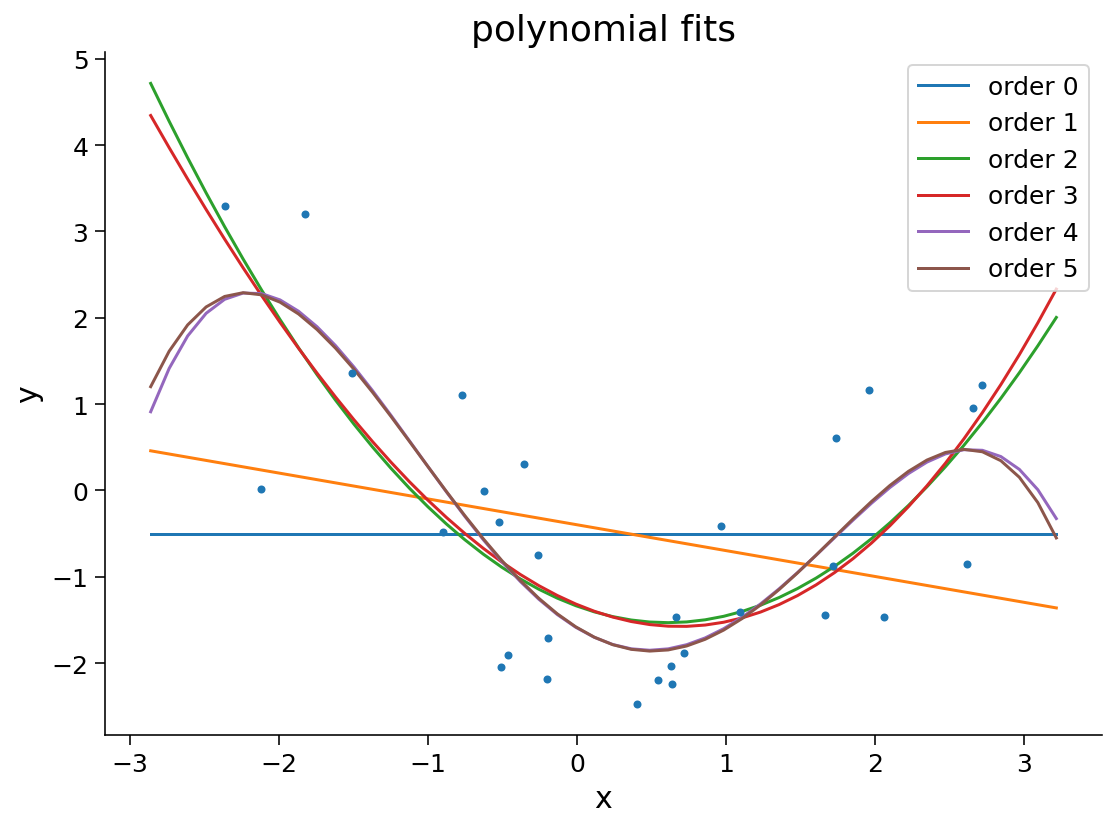

In [48]:
def solve_poly_reg(x, y, max_order):
  """Fit a polynomial regression model for each order 0 through max_order.

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    max_order (scalar): max order for polynomial fits

  Returns:
    dict: fitted weights for each polynomial model (dict key is order)
  """

  # Create a dictionary with polynomial order as keys,
  # and np array of theta_hat (weights) as the values
  theta_hats = {}

  # Loop over polynomial orders from 0 through max_order
  for order in range(max_order + 1):



    # Create design matrix
    X_design = make_design_matrix(x, order)

    # Fit polynomial model
    this_theta = ordinary_least_squares(X_design, y)

    theta_hats[order] = this_theta

  return theta_hats


max_order = 5
theta_hats = solve_poly_reg(x, y, max_order)

# Visualize
plot_fitted_polynomials(x, y, theta_hats)

Compute MSE and compare models

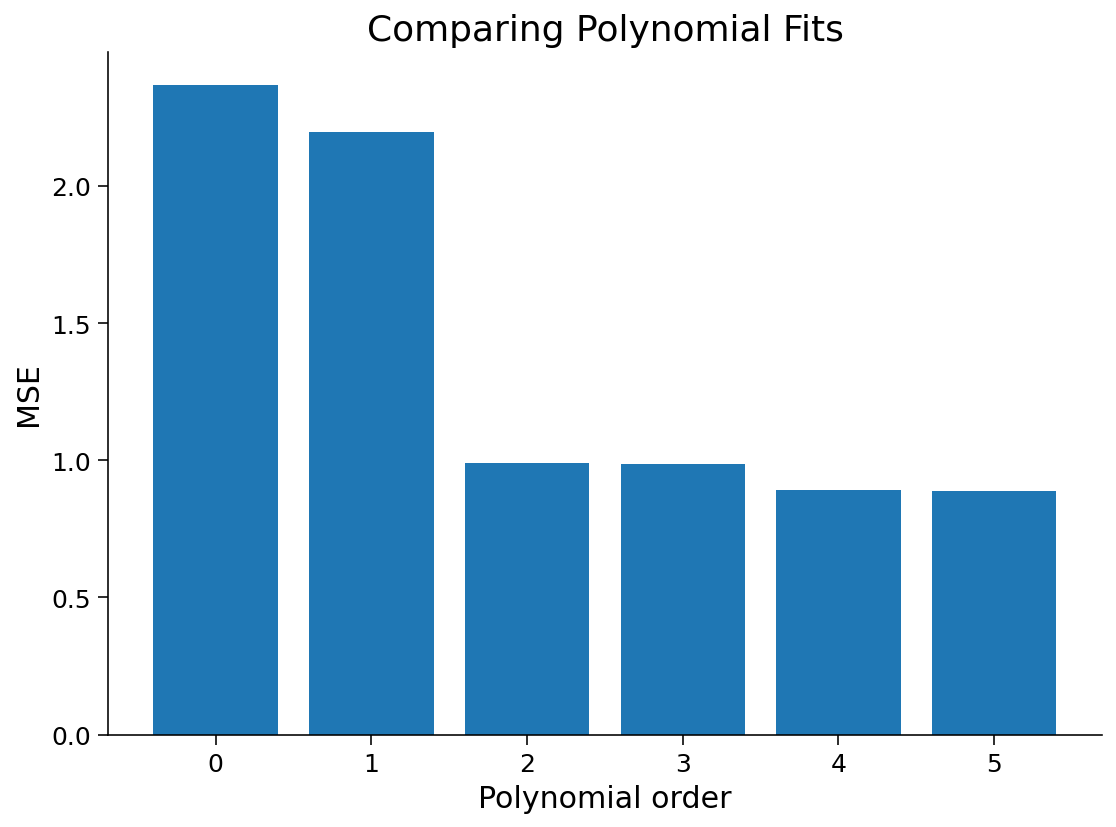

In [49]:
mse_list = []
order_list = list(range(max_order + 1))

for order in order_list:

  X_design = make_design_matrix(x, order)


  # Get prediction for the polynomial regression model of this order
  y_hat = X_design @ theta_hats[order]

  # Compute the residuals
  residuals = y - y_hat

  # Compute the MSE
  mse = np.mean(residuals ** 2)

  mse_list.append(mse)


# Visualize MSE of fits
evaluate_fits(order_list, mse_list)

# **Model Selection: Bias-variance trade-off**

In [50]:
# Imports

import numpy as np
import matplotlib.pyplot as plt

In [51]:
#@title Figure Settings
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [52]:
# @title Plotting Functions

def plot_MSE_poly_fits(mse_train, mse_test, max_order):
  """
    Plot the MSE values for various orders of polynomial fits on the same bar
    graph

    Args:
      mse_train (ndarray): an array of MSE values for each order of polynomial fit
      over the training data
      mse_test (ndarray): an array of MSE values for each order of polynomial fit
      over the test data
      max_order (scalar): max order of polynomial fit
  """
  fig, ax = plt.subplots()
  width = .35

  ax.bar(np.arange(max_order + 1) - width / 2, mse_train, width, label="train MSE")
  ax.bar(np.arange(max_order + 1) + width / 2, mse_test , width, label="test MSE")

  ax.legend()
  ax.set(xlabel='Polynomial order', ylabel='MSE', title ='Comparing polynomial fits');

In [53]:
# @title Helper functions

def ordinary_least_squares(x, y):
  """Ordinary least squares estimator for linear regression.

  Args:
    x (ndarray): design matrix of shape (n_samples, n_regressors)
    y (ndarray): vector of measurements of shape (n_samples)

  Returns:
    ndarray: estimated parameter values of shape (n_regressors)
  """

  return np.linalg.inv(x.T @ x) @ x.T @ y


def make_design_matrix(x, order):
  """Create the design matrix of inputs for use in polynomial regression

  Args:
    x (ndarray): input vector of shape (n_samples)
    order (scalar): polynomial regression order

  Returns:
    ndarray: design matrix for polynomial regression of shape (samples, order+1)
  """

  # Broadcast to shape (n x 1) so dimensions work
  if x.ndim == 1:
    x = x[:, None]

  #if x has more than one feature, we don't want multiple columns of ones so we assign
  # x^0 here
  design_matrix = np.ones((x.shape[0],1))

  # Loop through rest of degrees and stack columns
  for degree in range(1, order+1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix


def solve_poly_reg(x, y, max_order):
  """Fit a polynomial regression model for each order 0 through max_order.

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    max_order (scalar): max order for polynomial fits

  Returns:
    dict: fitted weights for each polynomial model (dict key is order)
  """

  # Create a dictionary with polynomial order as keys, and np array of theta
  # (weights) as the values
  theta_hats = {}

  # Loop over polynomial orders from 0 through max_order
  for order in range(max_order+1):

    X = make_design_matrix(x, order)
    this_theta = ordinary_least_squares(X, y)

    theta_hats[order] = this_theta

  return theta_hats

# **Train vs test data**

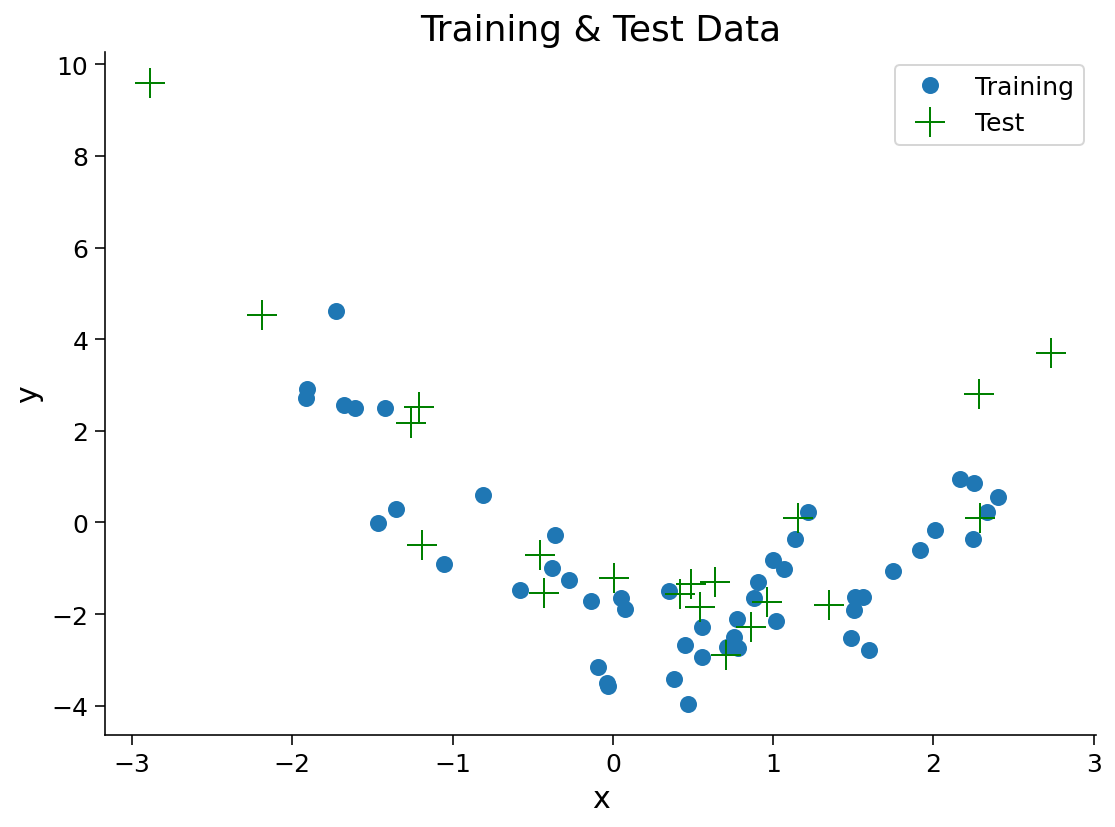

In [54]:
# @markdown Execute this cell to simulate both training and test data

### Generate training data
np.random.seed(0)
n_train_samples = 50
x_train = np.random.uniform(-2, 2.5, n_train_samples) # sample from a uniform distribution over [-2, 2.5)
noise = np.random.randn(n_train_samples) # sample from a standard normal distribution
y_train =  x_train**2 - x_train - 2 + noise

### Generate testing data
n_test_samples = 20
x_test = np.random.uniform(-3, 3, n_test_samples) # sample from a uniform distribution over [-2, 2.5)
noise = np.random.randn(n_test_samples) # sample from a standard normal distribution
y_test =  x_test**2 - x_test - 2 + noise

## Plot both train and test data
fig, ax = plt.subplots()
plt.title('Training & Test Data')
plt.plot(x_train, y_train, '.', markersize=15, label='Training')
plt.plot(x_test, y_test, 'g+', markersize=15, label='Test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y');

---
# Section 2: Bias-variance tradeoff


Finding a good model can be difficult. One of the most important concepts to keep in mind when modeling is the **bias-variance tradeoff**. 

**Bias** is the difference between the prediction of the model and the corresponding true output variables you are trying to predict. Models with high bias will not fit the training data well since the predictions are quite different from the true data. These high bias models are overly simplified - they do not have enough parameters and complexity to accurately capture the patterns in the data and are thus **underfitting**.


**Variance** refers to the variability of model predictions for a given input. Essentially, do the model predictions change a lot with changes in the exact training data used? Models with high variance are highly dependent on the exact training data used - they will not generalize well to test data. These high variance models are **overfitting** to the data.

In essence:

* High bias, low variance models have high train and test error.
* Low bias, high variance models have low train error, high test error
* Low bias, low variance models have low train and test error


As we can see from this list, we ideally want low bias and low variance models! These goals can be in conflict though - models with enough complexity to have low bias also tend to overfit and depend on the training data more. We need to decide on the correct tradeoff.

In this section, we will see the bias-variance tradeoff in action with polynomial regression models of different orders.

</details>

Graphical illustration of bias and variance.
(Source: http://scott.fortmann-roe.com/docs/BiasVariance.html)

![bias-variance](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/images/bias_variance/bullseye.png) 


In [55]:
# @markdown Execute this cell to estimate theta_hats
max_order = 5
theta_hats = solve_poly_reg(x_train, y_train, max_order)

# Compute and compare train vs test error

In [56]:
# @markdown Execute this cell for function `evalute_poly_reg`

def evaluate_poly_reg(x, y, theta_hats, max_order):
    """ Evaluates MSE of polynomial regression models on data

    Args:
      x (ndarray): input vector of shape (n_samples)
      y (ndarray): vector of measurements of shape (n_samples)
      theta_hats (dict):  fitted weights for each polynomial model (dict key is order)
      max_order (scalar): max order of polynomial fit

    Returns
      (ndarray): mean squared error for each order, shape (max_order)
    """

    mse = np.zeros((max_order + 1))
    for order in range(0, max_order + 1):
      X_design = make_design_matrix(x, order)
      y_hat = np.dot(X_design, theta_hats[order])
      residuals = y - y_hat
      mse[order] = np.mean(residuals ** 2)

    return mse

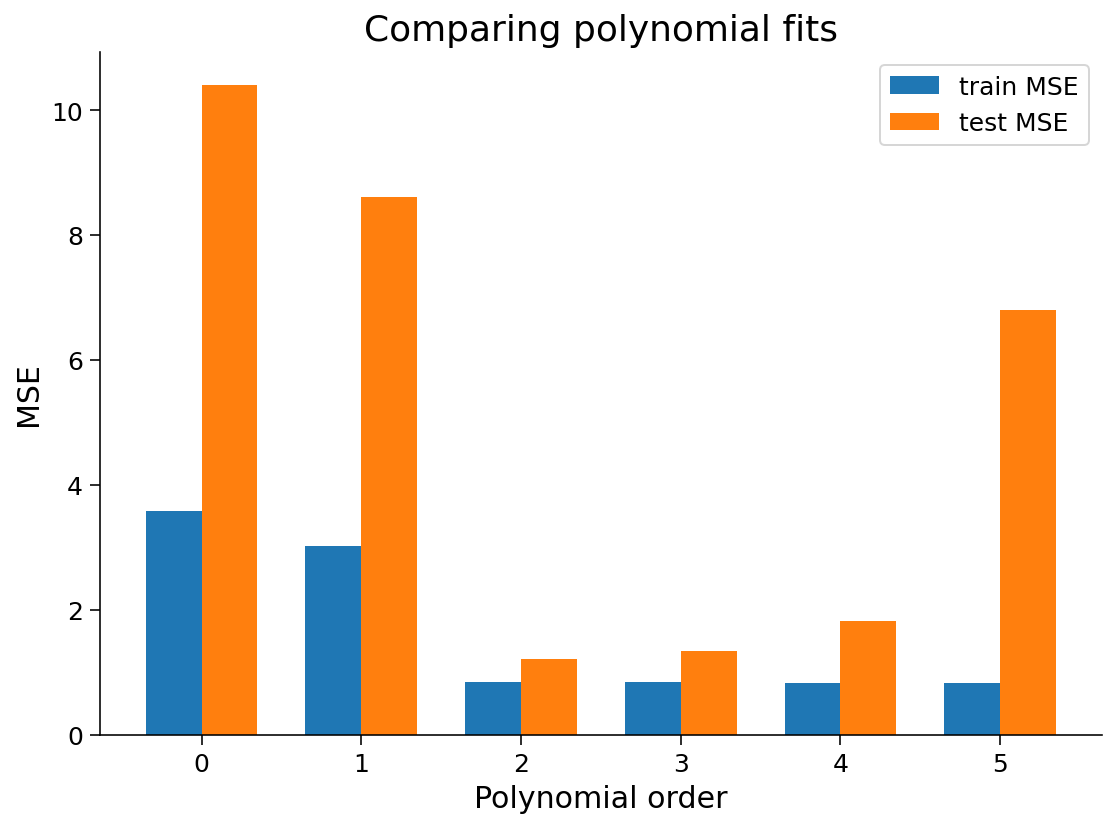

In [57]:
def compute_mse(x_train, x_test, y_train, y_test, theta_hats, max_order):
  """Compute MSE on training data and test data.

  Args:
    x_train(ndarray): training data input vector of shape (n_samples)
    x_test(ndarray): test data input vector of shape (n_samples)
    y_train(ndarray): training vector of measurements of shape (n_samples)
    y_test(ndarray): test vector of measurements of shape (n_samples)
    theta_hats(dict): fitted weights for each polynomial model (dict key is order)
    max_order (scalar): max order of polynomial fit

  Returns:
    ndarray, ndarray: MSE error on training data and test data for each order
  """



  mse_train = evaluate_poly_reg(x_train, y_train, theta_hats, max_order)
  mse_test = evaluate_poly_reg(x_test, y_test, theta_hats, max_order)

  return mse_train, mse_test


# Compute train and test MSE
mse_train, mse_test = compute_mse(x_train, x_test, y_train, y_test, theta_hats, max_order)

# Visualize
plot_MSE_poly_fits(mse_train, mse_test, max_order)

# **Model Selection: Cross-validation**

In [58]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [59]:
#@title Figure Settings
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [60]:
# @title Plotting Functions


def plot_cross_validate_MSE(mse_all):
  """ Plot the MSE values for the K_fold cross validation

  Args:
    mse_all (ndarray): an array of size (number of splits, max_order + 1)
  """
  plt.figure()
  plt.boxplot(mse_all, labels=np.arange(0, max_order + 1))

  plt.xlabel('Polynomial Order')
  plt.ylabel('Validation MSE')
  plt.title(f'Validation MSE over {n_splits} splits of the data')


def plot_AIC(order_list, AIC_list):
  """ Plot the AIC value for fitted polynomials of various orders

  Args:
    order_list (list): list of fitted polynomial orders
    AIC_list (list): list of AIC values corresponding to each polynomial model on order_list
  """
  plt.bar(order_list, AIC_list)
  plt.ylabel('AIC')
  plt.xlabel('polynomial order')
  plt.title('comparing polynomial fits')
  plt.show()

In [61]:
# @title Helper Functions

def ordinary_least_squares(x, y):
  """Ordinary least squares estimator for linear regression.

  Args:
    x (ndarray): design matrix of shape (n_samples, n_regressors)
    y (ndarray): vector of measurements of shape (n_samples)

  Returns:
    ndarray: estimated parameter values of shape (n_regressors)
  """

  return np.linalg.inv(x.T @ x) @ x.T @ y

def make_design_matrix(x, order):
  """Create the design matrix of inputs for use in polynomial regression

  Args:
    x (ndarray): input vector of shape (n_samples)
    order (scalar): polynomial regression order

  Returns:
    ndarray: design matrix for polynomial regression of shape (samples, order+1)
  """

  # Broadcast to shape (n x 1)
  if x.ndim == 1:
    x = x[:, None]

  #if x has more than one feature, we don't want multiple columns of ones so we assign
  # x^0 here
  design_matrix = np.ones((x.shape[0], 1))

  # Loop through rest of degrees and stack columns
  for degree in range(1, order + 1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix


def solve_poly_reg(x, y, max_order):
  """Fit a polynomial regression model for each order 0 through max_order.

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    max_order (scalar): max order for polynomial fits

  Returns:
    dict: fitted weights for each polynomial model (dict key is order)
  """

  # Create a dictionary with polynomial order as keys, and np array of theta
  # (weights) as the values
  theta_hats = {}

  # Loop over polynomial orders from 0 through max_order
  for order in range(max_order + 1):

    X = make_design_matrix(x, order)
    this_theta = ordinary_least_squares(X, y)

    theta_hats[order] = this_theta

  return theta_hats

def evaluate_poly_reg(x, y, theta_hats, max_order):
    """ Evaluates MSE of polynomial regression models on data

    Args:
      x (ndarray): input vector of shape (n_samples)
      y (ndarray): vector of measurements of shape (n_samples)
      theta_hat (dict):  fitted weights for each polynomial model (dict key is order)
      max_order (scalar): max order of polynomial fit

    Returns
      (ndarray): mean squared error for each order, shape (max_order)
    """

    mse = np.zeros((max_order + 1))
    for order in range(0, max_order + 1):
      X_design = make_design_matrix(x, order)
      y_hat = np.dot(X_design, theta_hats[order])
      residuals = y - y_hat
      mse[order] = np.mean(residuals ** 2)

    return mse

steps are summarized in this diagram from Scikit-learn (https://scikit-learn.org/stable/modules/cross_validation.html)

![Diagram from Sklearn](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png) 

In [62]:
#@title
#@markdown Execute this cell to simulate data and fit polynomial regression models

### Generate training data
np.random.seed(0)
n_train_samples = 50
x_train = np.random.uniform(-2, 2.5, n_train_samples)  # sample from a uniform distribution over [-2, 2.5)
noise = np.random.randn(n_train_samples)  # sample from a standard normal distribution
y_train = x_train**2 - x_train - 2 + noise

### Generate testing data
n_test_samples = 20
x_test = np.random.uniform(-3, 3, n_test_samples)  # sample from a uniform distribution over [-2, 2.5)
noise = np.random.randn(n_test_samples)  # sample from a standard normal distribution
y_test = x_test**2 - x_test - 2 + noise

### Fit polynomial regression models
max_order = 5
theta_hats = solve_poly_reg(x_train, y_train, max_order)

# Implement cross-validation

In [63]:
help(solve_poly_reg)

Help on function solve_poly_reg in module __main__:

solve_poly_reg(x, y, max_order)
    Fit a polynomial regression model for each order 0 through max_order.
    
    Args:
      x (ndarray): input vector of shape (n_samples)
      y (ndarray): vector of measurements of shape (n_samples)
      max_order (scalar): max order for polynomial fits
    
    Returns:
      dict: fitted weights for each polynomial model (dict key is order)



In [64]:
help(evaluate_poly_reg)

Help on function evaluate_poly_reg in module __main__:

evaluate_poly_reg(x, y, theta_hats, max_order)
    Evaluates MSE of polynomial regression models on data
    
    Args:
      x (ndarray): input vector of shape (n_samples)
      y (ndarray): vector of measurements of shape (n_samples)
      theta_hat (dict):  fitted weights for each polynomial model (dict key is order)
      max_order (scalar): max order of polynomial fit
    
    Returns
      (ndarray): mean squared error for each order, shape (max_order)



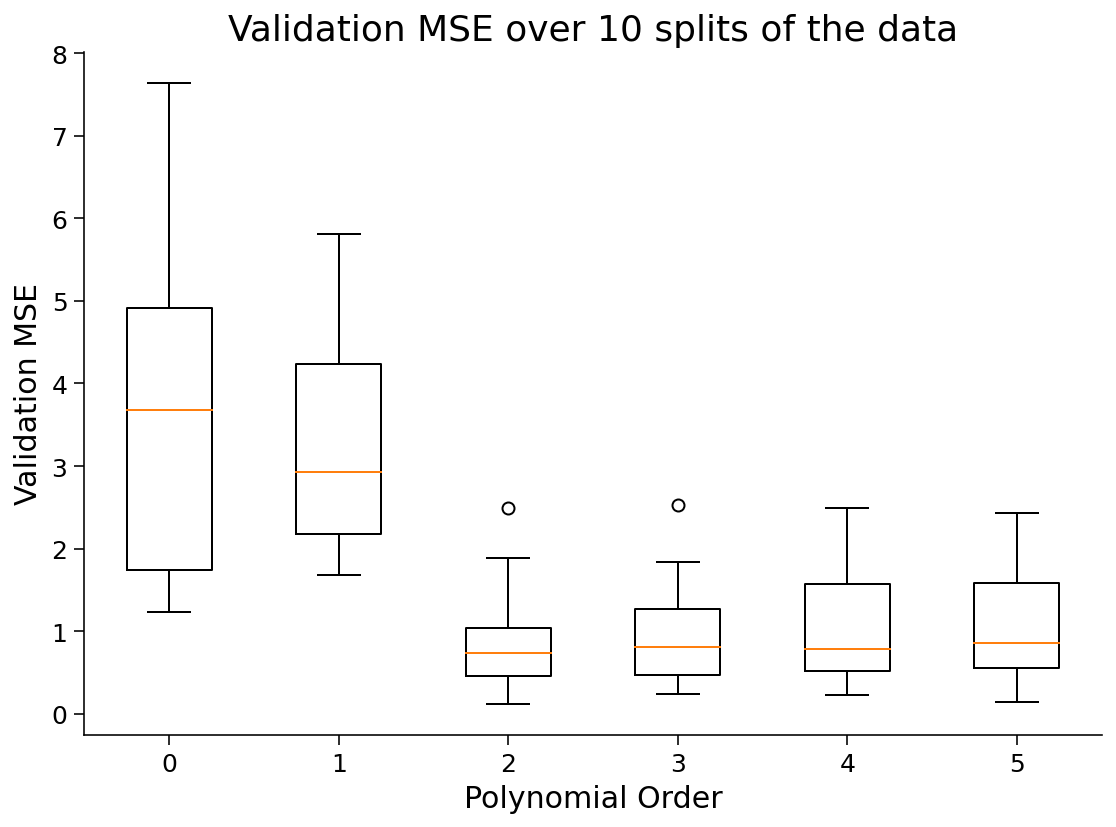

In [65]:
def cross_validate(x_train, y_train, max_order, n_splits):
  """ Compute MSE for k-fold validation for each order polynomial

  Args:
    x_train (ndarray): training data input vector of shape (n_samples)
    y_train (ndarray): training vector of measurements of shape (n_samples)
    max_order (scalar): max order of polynomial fit
    n_split (scalar): number of folds for k-fold validation

  Return:
    ndarray: MSE over splits for each model order, shape (n_splits, max_order + 1)

  """

  # Initialize the split method
  kfold_iterator = KFold(n_splits)

  # Initialize np array mse values for all models for each split
  mse_all = np.zeros((n_splits, max_order + 1))

  for i_split, (train_indices, val_indices) in enumerate(kfold_iterator.split(x_train)):

      # Split up the overall training data into cross-validation training and validation sets
      x_cv_train = x_train[train_indices]
      y_cv_train = y_train[train_indices]
      x_cv_val = x_train[val_indices]
      y_cv_val = y_train[val_indices]



      # Fit models
      theta_hats = solve_poly_reg(x_cv_train, y_cv_train, max_order)

      # Compute MSE
      mse_this_split = evaluate_poly_reg(x_cv_val, y_cv_val, theta_hats, max_order)

      mse_all[i_split] = mse_this_split

  return mse_all


# Cross-validate
max_order = 5
n_splits = 10
mse_all = cross_validate(x_train, y_train, max_order, n_splits)

# Visualize
plot_cross_validate_MSE(mse_all)